### Codio Activity 13.3: Determining the Logistic Functions Parameters

**Expected Time = 60 minutes** 

**Total Points = 50** 

This activity focuses on determining the appropriate parameters for the logistic model using optimization.  To begin, you will write a function to represent $\sigma(x)$.  Then, you will use the scikit-learn metric `log_loss` to evaluate the cross entropy based on the probabilities.  Finally, you will explore different parameters to select that which minimizes the cross entropy.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)

### The Problem

As discussed in the lectures, with gaussian assumptions of the data distributions, you are able to directly compute the parameters for the logistic model.  However, this is not going to work in higher dimensional settings.  As you see here, this assumption seems reasonable for the flipper length of our penguins data.

<center>
    <img src = 'images/flipperdist.png' />
</center>

But rather than using the mean and variance of these distributions learned through maximum likelihood, we will frame the problem of parameter estimation as one of minimization, and among a range of possible $\beta$ values, select that which minimized cross entropy.

[Back to top](#-Index)

### Problem 1

#### Sigma Function

**10 Points**

To begin, you are to define a sigmoid function with `sigma` below that takes in an array $X$, $\beta_0$, $\beta_1$, and returns 

$$\sigma(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$$

In [3]:
### GRADED

def sigma(x, beta_0, beta_1):
    """
    This function evaluates the sigmoid function with 
    given parameters beta_0 and beta_1
    
    Argments
    --------
    x: np.array
       domain for evaluation of sigma
    beta_0: float
       intercept term of linear function
    beta_1: float
        slope of linear term
    
    Returns
    -------
    np.array 
    """
    return None

# YOUR CODE HERE
#raise NotImplementedError()
def sigma(x, beta_0, beta_1):
    return (1 / (1 + np.exp(-(beta_0 + beta_1 * x))))

    
# Answer check
print(sigma(X, 1, 1))

     flipper_length_mm
0                  1.0
1                  1.0
2                  1.0
4                  1.0
5                  1.0
..                 ...
338                1.0
340                1.0
341                1.0
342                1.0
343                1.0

[265 rows x 1 columns]


[Back to top](#-Index)

### Problem 2

#### Using a given $\beta_0$ and $\beta_1$ for predictions

**10 Points**

Now, your `sigma` function should return probabilities for making a classification.  Use your sigma function and the given $\beta_0$ and $\beta_1$ below to create predictions on X.  If the returned value is $\geq .5$ predict class 1 and otherwise predict 0. Assign the probabilites as an array to `probs` and the subsequent predictions based on these probabilities to `predictions`.  



In [5]:
beta_0 = -165
beta_1 = 0.7

In [8]:
### GRADED
probs = ''
predictions = ''


# YOUR CODE HERE
#raise NotImplementedError()
probs = sigma(X, beta_0, beta_1)
predictions = np.where(probs>= 0.5, 1, 0)
# Answer check
np.unique(predictions)

array([0])

[Back to top](#-Index)

### Problem 3

#### Computing the Cross Entropy

**10 Points**

Recall that our goal is to find the $\beta_0$ and $\beta_1$ values that minimize the cross entropy.  The cross entropy was given to us as

$$-\sum_{i = 1} ^ N \big( (1 - y_i)\log(1 - \sigma(x_i)\big) + \big(y_i(\log \sigma(x_i) \big)$$

Scikitlearn has an implementation of this in the metrics module with the `log_loss` function (imported again below).  To use this, we want to pass an array of probabilities for both the positive and negative classes against the true $y$ values.  Below, this array is created for you using the earlier probabilities.  Compute the log loss of your predicted probabilities and assign the value to `loss1` below.  

In [9]:
from sklearn.metrics import log_loss

In [12]:
prob_array = np.concatenate((probs.values, (1 - probs).values), axis = 1)
pd.DataFrame(prob_array, columns = ['probability 0', 'probability 1'])

,probability 0,probability 1
0,2.325527e-17,1.000000
1,7.701087e-16,1.000000
2,4.193796e-13,1.000000
3,1.034177e-13,1.000000
4,1.266417e-14,1.000000
...,...,...
260,2.504516e-07,1.000000
261,5.043474e-07,0.999999
262,6.772415e-05,0.999932
263,6.176061e-08,1.000000


In [13]:
### GRADED

loss1 = ''

# YOUR CODE HERE
#raise NotImplementedError()
loss1 = log_loss(y, prob_array)

# Answer check
print(loss1)

17.157337553379403


[Back to top](#-Index)

### Problem 4

#### Comparing Loss across Parameters

**10 Points**

Remember that your goal is to identify the parameters that **minimize** the log loss.  However, we know the rough values of this from our last assignment -- at least the values that come from the solved optimization problem with scikitlearn.  

Accordingly, below consider an array of parameters `beta_1s`.  Complete the code below to loop over these parameters, determine probabilities using them, create a probability array, and compute the log loss of these predictions.  

Keep track of the losses as a list in `losses`.  

Finally, determine the beta_1 that minimizes the log_loss and assign it as a float to `best_beta1`.

In [14]:
beta_1s = np.linspace(0, 1, 1000) #array of beta_1's to use
beta_0 = -142 #beta_0

In [27]:
### GRADED
losses = []
best_beta1 = ''

# YOUR CODE HERE
#raise NotImplementedError()
#test_maes.index(min(test_maes)) + 1
for beta_1 in beta_1s:
    #print(beta_0, beta_1)
    probs = sigma(X, beta_0, beta_1)
    prob_array = np.concatenate((probs.values, (1 - probs).values), axis = 1)
    loss = log_loss(y, prob_array)
    losses.append(loss)
    
best_beta1 = beta_1s[losses.index(min(losses))]

# Answer check
print(best_beta1)

0.7087087087087087


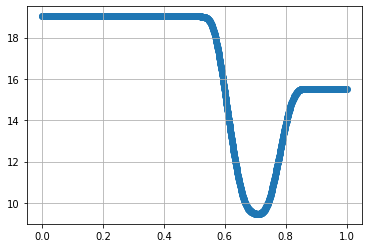

In [31]:
beta_1s[losses.index(min(losses))], beta_1s[0]
#losses
plt.scatter(beta_1s, losses)
plt.grid()

[Back to top](#-Index)

### Problem 5

#### Comparing the results to `LogisticRegression`

**10 Points**

Behind the scenes, this is what the `LogisticRegression` estimator is doing.  However, unlike our guess and test strategy above, a solver that implements gradient descent is used to target the optimal parameter values.  Specifically, the solvers `'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'` are available and `liblinear` is the default.  

As a check, implement a logistic regression estimator using scikitlearn with all default settings and examine the coefficient.  Is it close to what you selected in problem 4 above?  

Assign your fit estimator as `log_reg` the coefficient as a float to `coef` and the absolute difference between the coefficient from scikitlearn and that of `best_beta1` from problem 4 as difference.

In [33]:
### GRADED

logreg = ''
coef = ''
difference = ''

# YOUR CODE HERE
#raise NotImplementedError()
logreg = LogisticRegression().fit(X, y)
coef = logreg.coef_[0][0]
difference = abs(coef - best_beta1)

# Answer check
print(f'Beta_1 from sklearn: {coef}\nBeta_1 from our minimization: {best_beta1}\nDifference: {difference: .2f}')


Beta_1 from sklearn: 0.6948193765225441
Beta_1 from our minimization: 0.7087087087087087
Difference:  0.01
